# Cluster Analysis in R

> build a strong intuition for how they work and how to interpret hierarchical clustering and k-means clustering results

- author: Victor Omondi
- toc: true
- comments: true
- categories: [machine-learning, cluster-analysis, r]
- image: images/cl-r-shield.png

# Overview

Cluster analysis is a powerful toolkit in the data science workbench. It is used to find groups of observations (clusters) that share similar characteristics. These similarities can inform all kinds of business decisions; for example, in marketing, it is used to identify distinct groups of customers for which advertisements can be tailored. We will explore two commonly used clustering methods - hierarchical clustering and k-means clustering. We'll build a strong intuition for how they work and how to interpret their results. We'll develop this intuition by exploring three different datasets: soccer player positions, wholesale customer spending data, and longitudinal occupational wage data.

# Libraries

In [42]:
library(dplyr)
library(ggplot2)
library(dummies)
library(readr)
library(dendextend)
library(purrr)
library(cluster)

Warning message:
"package 'cluster' was built under R version 3.6.3"

# Calculating distance between observations

Cluster analysis seeks to find groups of observations that are similar to one another, but the identified groups are different from each other. This similarity/difference is captured by the metric called distance. We will calculate the distance between observations for both continuous and categorical features. We will also develop an intuition for how the scales of features can affect distance.

## What is cluster analysis?

A form of exploratory data analysis (EDA) where observations are divided into meaningful groups that share common characteristics(features).


### When to cluster?

- Identifying distinct groups of stocks that follow similar trading patterns.
- Using consumer behavior data to identify distinct segments within a market.

## Distance between two observations

### Distance vs Similarity
$distance = 1 - similarity$

### dist() function

In [2]:
two_players = data.frame(X=c(0, 9), Y=c(0,12))
two_players %>%
    dist(method="euclidean")

   1
2 15

In [3]:
three_players = data.frame(X=c(0, 9, -2), Y=c(0,12, 19))
three_players %>%
    dist()

         1        2
2 15.00000         
3 19.10497 13.03840

In [4]:
players <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/1219/datasets/94af7037c5834527cc8799a9723ebf3b5af73015/lineup.rds")))
head(players)

x,y
-1,1
-2,-3
8,6
7,-8
-12,8
-15,0


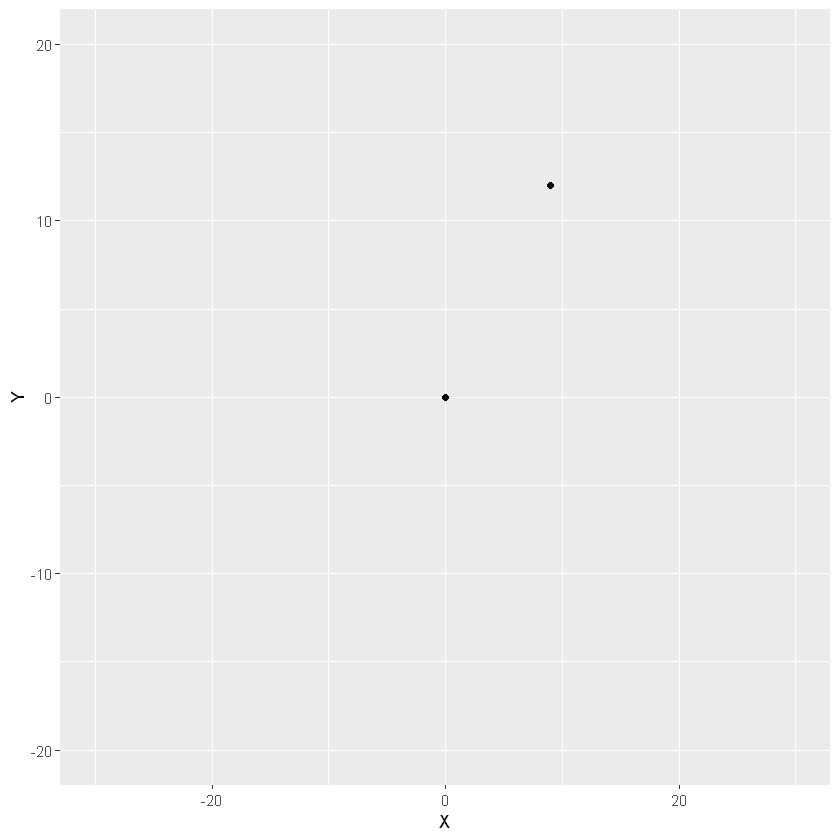

In [5]:
# Plot the positions of the players
ggplot(two_players, aes(x = X, y = Y)) + 
  geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))



In [6]:
# Split the players data frame into two observations
player1 <- two_players[1, ]
player2 <- two_players[2, ]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$X - player2$X)^2 + (player1$Y - player2$Y)^2 )
player_distance

[1] 15

The dist() function makes life easier when working with many dimensions and observations.

In [7]:
dist(three_players)

         1        2
2 15.00000         
3 19.10497 13.03840

In [8]:
three_players

X,Y
0,0
9,12
-2,19


## The importance of scale

 when a variable is on a larger scale than other variables in data it may disproportionately influence the resulting distance calculated between the observations. 
 
 `scale()` function by default centers & scales column features.

## Measuring distance for categorical data

### Dummication in R
`dummy.data.frame()`

In [9]:
job_survey = read.csv("datasets/job_survey.csv")
job_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


In [10]:
# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method="binary")
# Print the Distance Matrix
dist_survey

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
"non-list contrasts argument ignored"

          1         2         3         4
2 0.0000000                              
3 1.0000000 1.0000000                    
4 0.0000000 0.0000000 1.0000000          
5 0.6666667 0.6666667 1.0000000 0.6666667

this distance metric successfully captured that observations 1 and 2 are identical (distance of 0)

# Hierarchical clustering

How do you find groups of similar observations (clusters) in data using the calculated distances? We will explore the fundamental principles of hierarchical clustering - the linkage criteria and the dendrogram plot - and how both are used to build clusters. We will also explore data from a wholesale distributor in order to perform market segmentation of clients using their spending habits.

## Comparing more than two observations

### Hierarchical clustering
- **Complete Linkage**: maximum distance between two sets
- **Single Linkage**: minimum distance between two sets
- **Average Linkage**: average distance between two sets


## Capturing K clusters

### Hierarchical clustering in R

- `hclust()` function to calculate the iterative linkage steps
- `cutree()` function to extract the cluster assignments for the desired number (k) of clusters.

positions of 12 players at the start of a 6v6 soccer match. 

In [11]:
head(players)

x,y
-1,1
-2,-3
8,6
7,-8
-12,8
-15,0


In [12]:
dist_players = dist(players, method = "euclidean")
hc_players = hclust(dist_players, method = "complete")

### Extracting K clusters

In [13]:
(cluster_assignments <- cutree(hc_players, k=2))

[1] 1 1 2 2 1 1 1 2 2 2 1 2

In [14]:
head(
    players_clustered <- players %>%
        mutate(cluster = cluster_assignments), 
    10)

x,y,cluster
-1,1,1
-2,-3,1
8,6,2
7,-8,2
-12,8,1
-15,0,1
-13,-10,1
15,16,2
21,2,2
12,-15,2


`players_clustered` data frame contains the x & y positions of 12 players at the start of a 6v6 soccer game to which we have added clustering assignments based on the following parameters:

- Distance: Euclidean
- Number of Clusters (k): 2
- Linkage Method: Complete

### Exploring the clusters

In [15]:
# Count the cluster assignments
count(players_clustered, cluster)

cluster,n
1,6
2,6


### Visualizing K Clusters

Because clustering analysis is always in part qualitative, it is incredibly important to have the necessary tools to explore the results of the clustering.

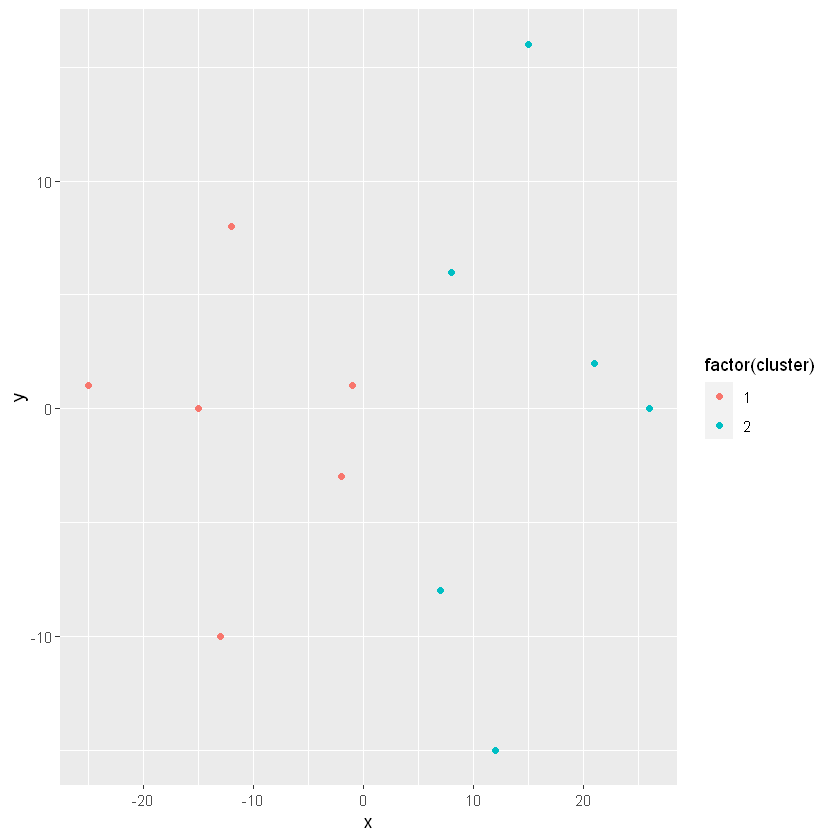

In [16]:
players_clustered %>%
    ggplot(aes(x=x, y=y, color=factor(cluster)))+
    geom_point()

## Visualizing the dendrogram

### Plotting the dendrogram

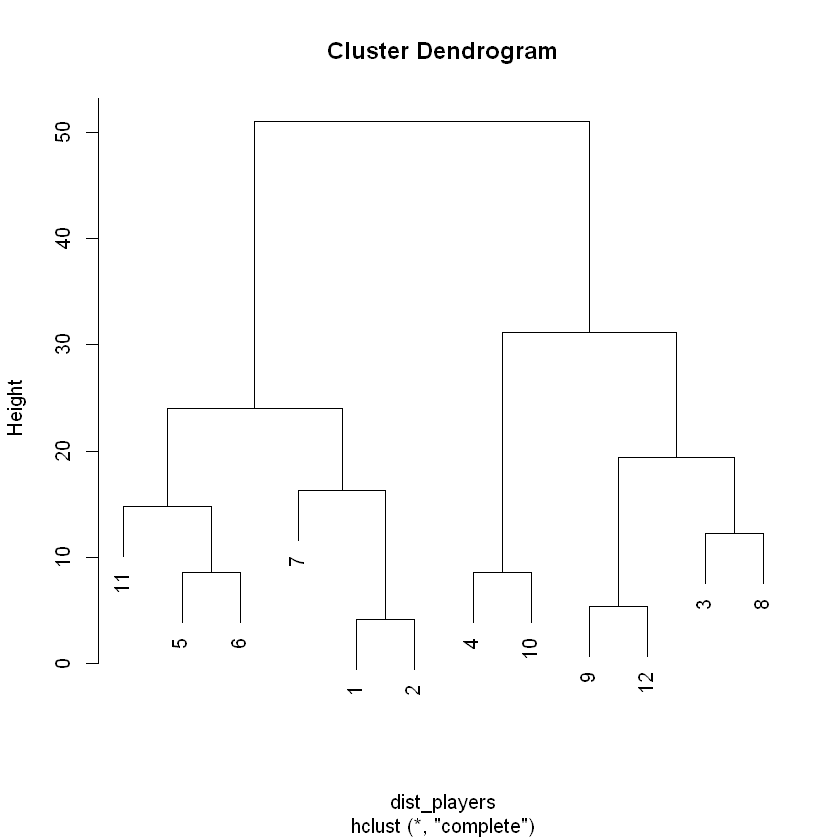

In [17]:
plot(hc_players)

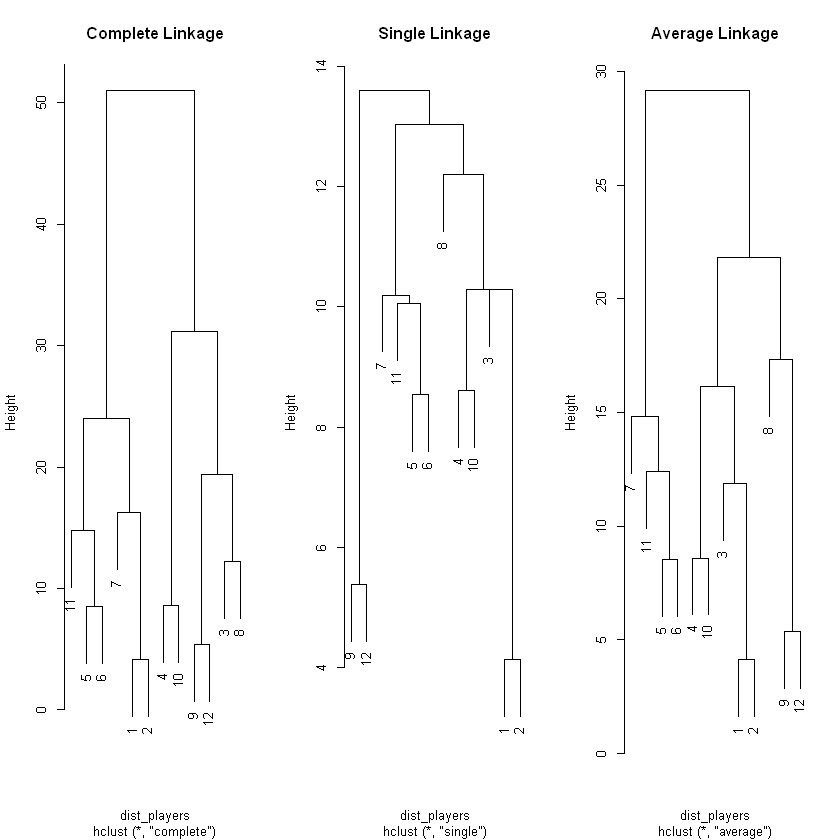

In [18]:
# Prepare the Distance Matrix
dist_players <- dist(players)

# Generate hclust for complete, single & average linkage methods
hc_complete <- hclust(dist_players, method="complete")
hc_single <- hclust(dist_players, method="single")
hc_average <- hclust(dist_players, method="average")

# Plot & Label the 3 Dendrograms Side-by-Side
# Hint: To see these Side-by-Side run the 4 lines together as one command
par(mfrow = c(1,3))
plot(hc_complete, main = 'Complete Linkage')
plot(hc_single, main = 'Single Linkage')
plot(hc_average, main = 'Average Linkage')

### Height of the tree

An advantage of working with a clustering method like hierarchical clustering is that you can describe the relationships between your observations based on both the distance metric and the linkage metric selected (the combination of which defines the height of the tree).

## Cutting the tree


### Coloring the dendrogram - height

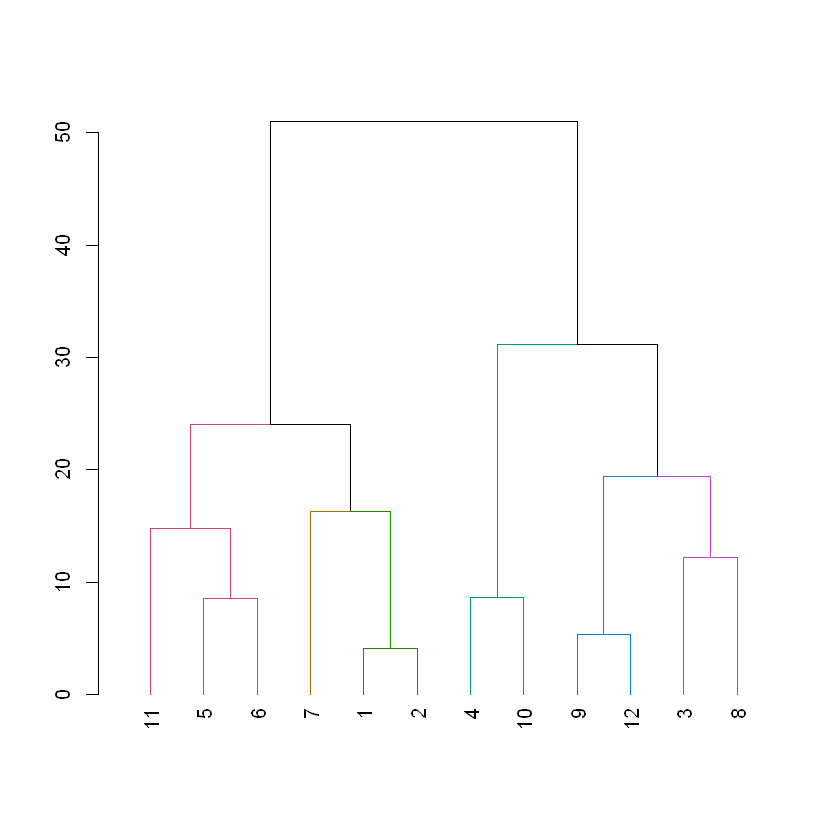

In [19]:
dend_players = as.dendrogram(hc_players)
dend_colored = color_branches(dend_players, h=15)
plot(dend_colored)

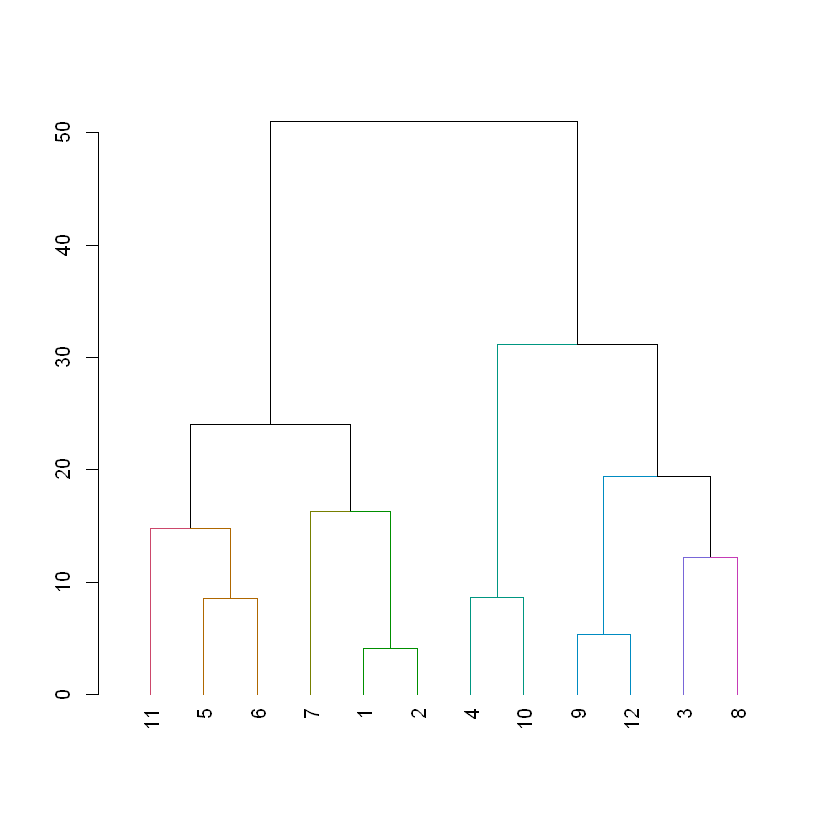

In [20]:
dend_players = as.dendrogram(hc_players)
dend_colored = color_branches(dend_players, h=10)
plot(dend_colored)

### Coloring the dendrogram - K

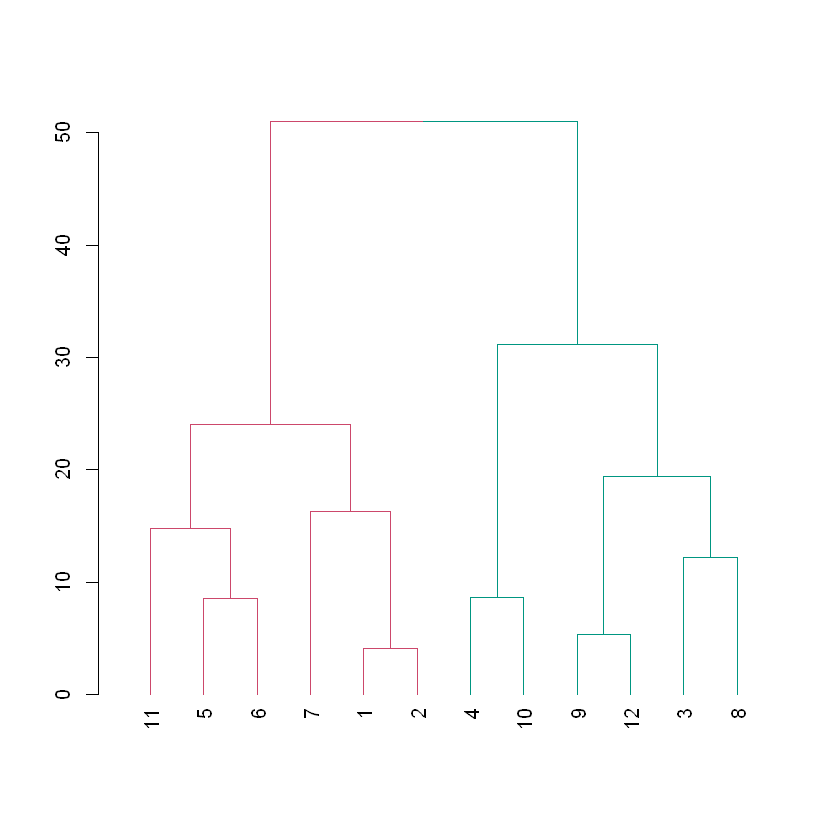

In [21]:
dend_players = as.dendrogram(hc_players)
dend_colored = color_branches(dend_players, k=2)
plot(dend_colored)

### cutree() using height

In [22]:
cluster_assignments <- cutree(hc_players, h=15)
cluster_assignments

[1] 1 1 2 3 4 4 5 2 6 3 4 6

In [23]:
head(
    players_clustered <- 
    players %>%
        mutate(cluster = cluster_assignments),
    10)

x,y,cluster
-1,1,1
-2,-3,1
8,6,2
7,-8,3
-12,8,4
-15,0,4
-13,-10,5
15,16,2
21,2,6
12,-15,3


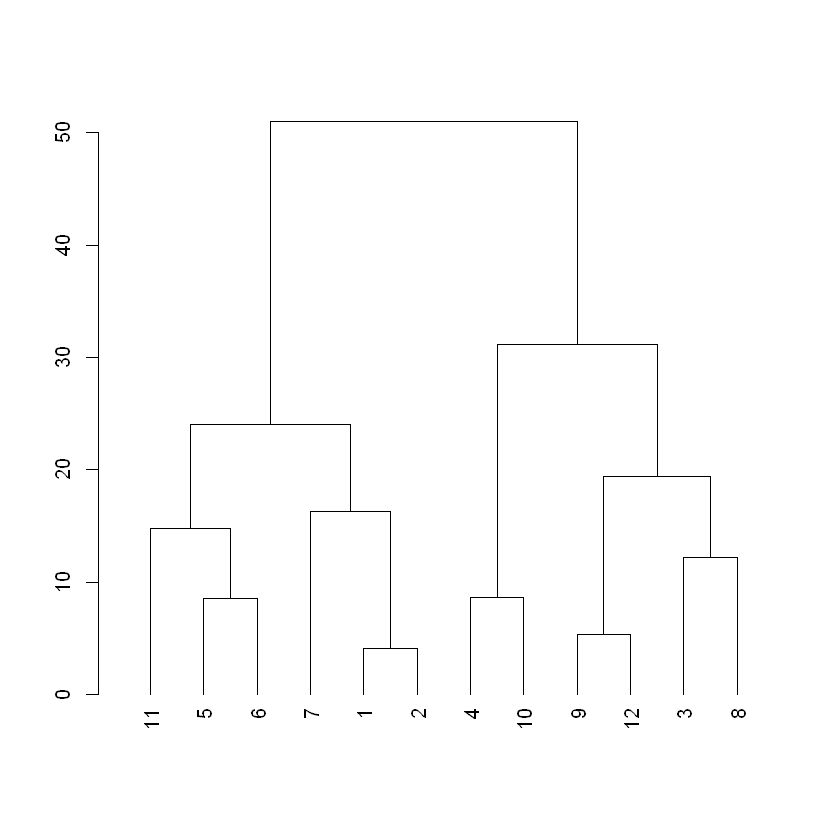

In [24]:
dist_players <- dist(players, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Create a dendrogram object from the hclust variable
dend_players <- as.dendrogram(hc_players)

# Plot the dendrogram
plot(dend_players)

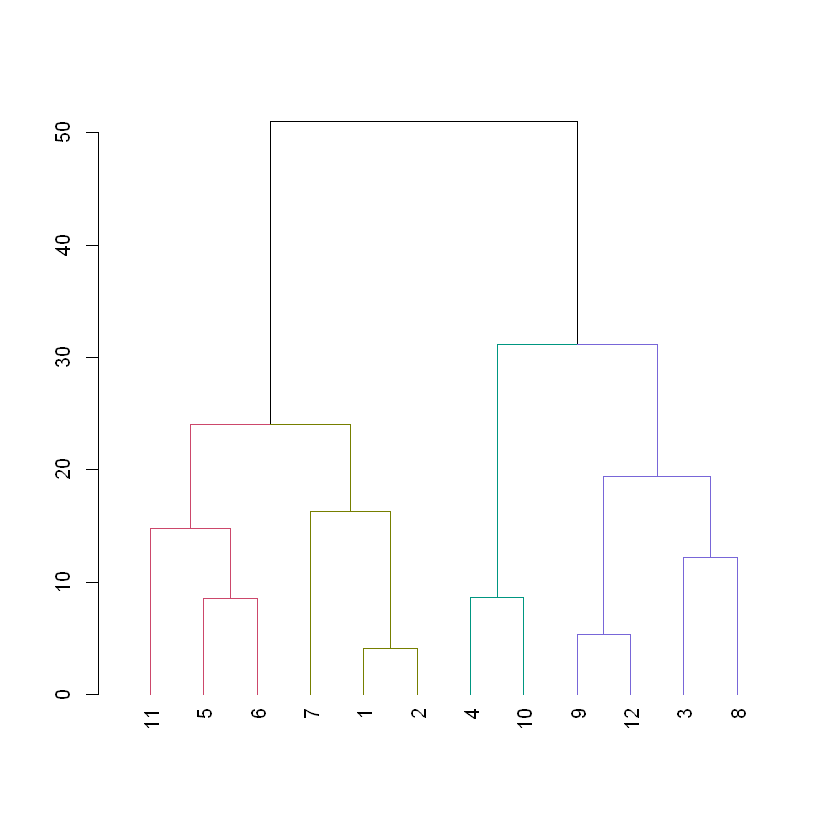

In [25]:
# Color branches by cluster formed from the cut at a height of 20 & plot
dend_20 <- color_branches(dend_players, h = 20)

# Plot the dendrogram with clusters colored below height 20
plot(dend_20)



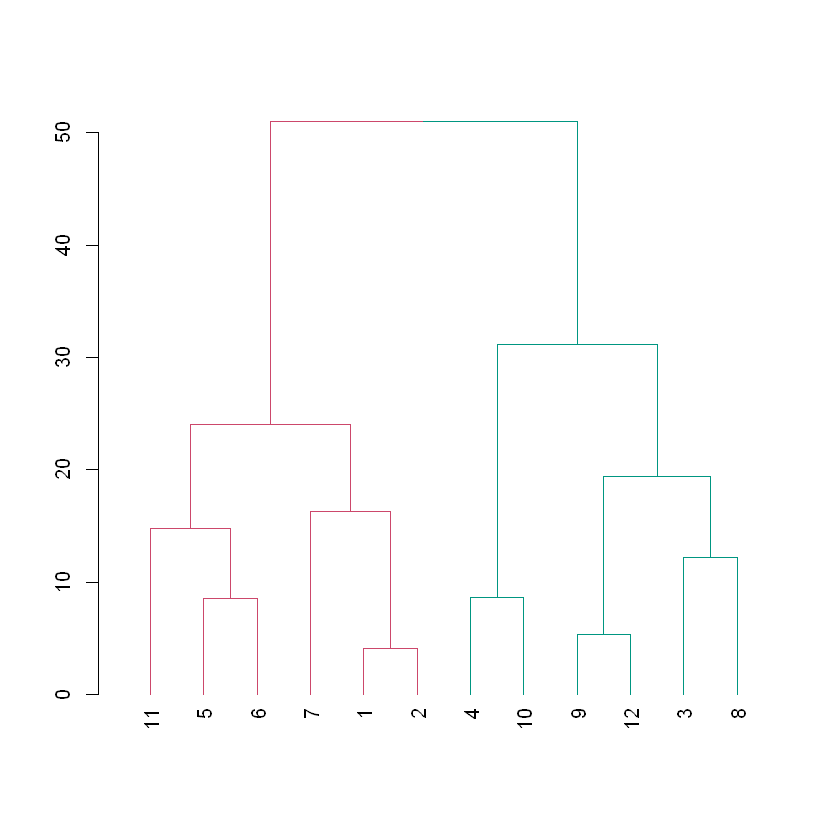

In [26]:
# Color branches by cluster formed from the cut at a height of 40 & plot
dend_40 <- color_branches(dend_players, h=40)

# Plot the dendrogram with clusters colored below height 40
plot(dend_40)


The height of any branch is determined by the linkage and distance decisions (in this case complete linkage and Euclidean distance). While the members of the clusters that form below a desired height have a maximum linkage+distance amongst themselves that is less than the desired height.

## Making sense of the clusters

### Wholesale dataset
- 45 observations
- 3 features:
  - Milk Spending
  - Grocery Spending
  - Frozen Food Spending


In [27]:
head(
    ws_customers <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/1219/datasets/3558d2b5564714d85120cb77a904a2859bb3d03e/ws_customers.rds"))) , 
    10
)

Milk,Grocery,Frozen
11103,12469,902
2013,6550,909
1897,5234,417
1304,3643,3045
3199,6986,1455
4560,9965,934
879,2060,264
6243,6360,824
13316,20399,1809
5302,9785,364


### Exploring more than 2 dimensions
- Plot 2 dimensions at a time
- Visualize using PCA
- Summary statistics by feature


### Segment wholesale customers

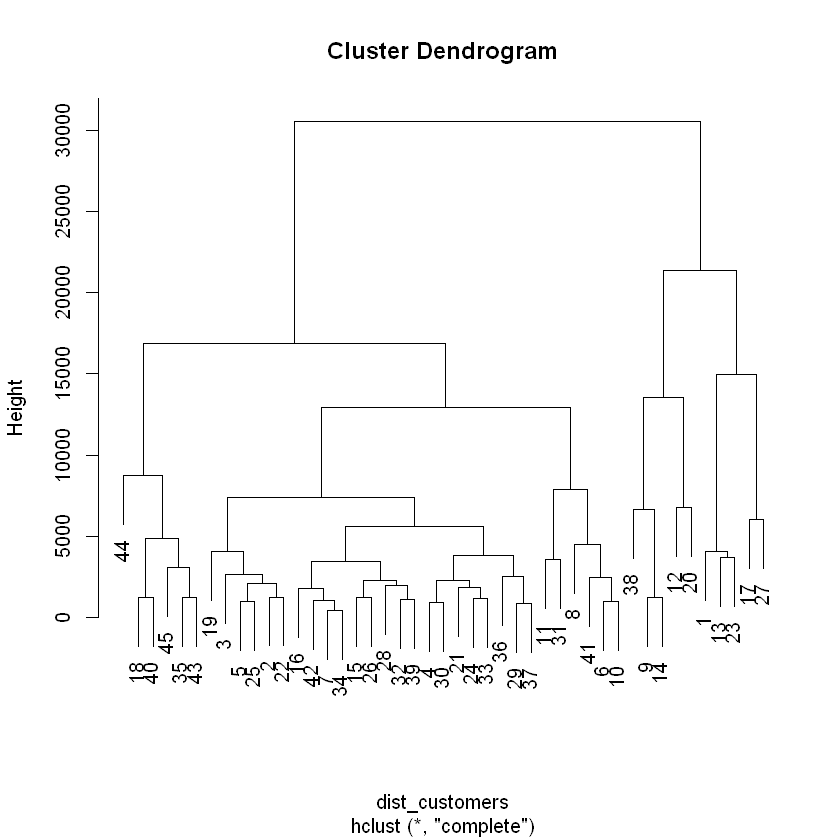

In [28]:
# Calculate Euclidean distance between customers
dist_customers <- dist(ws_customers, method="euclidean")

# Generate a complete linkage analysis 
hc_customers <- hclust(dist_customers, method="complete")

# Plot the dendrogram
plot(hc_customers)



In [29]:
# Create a cluster assignment vector at h = 15000
clust_customers <- cutree(hc_customers, h=15000)

# Generate the segmented customers data frame
head(
    segment_customers <- mutate(ws_customers, cluster = clust_customers), 
    10
)

Milk,Grocery,Frozen,cluster
11103,12469,902,1
2013,6550,909,2
1897,5234,417,2
1304,3643,3045,2
3199,6986,1455,2
4560,9965,934,2
879,2060,264,2
6243,6360,824,2
13316,20399,1809,3
5302,9785,364,2


### Explore wholesale customer clusters

Since we are working with more than 2 dimensions it would be challenging to visualize a scatter plot of the clusters, instead we will rely on summary statistics to explore these clusters. We will analyze the mean amount spent in each cluster for all three categories.

In [30]:
# Count the number of customers that fall into each cluster
count(segment_customers, cluster)



cluster,n
1,5
2,29
3,5
4,6


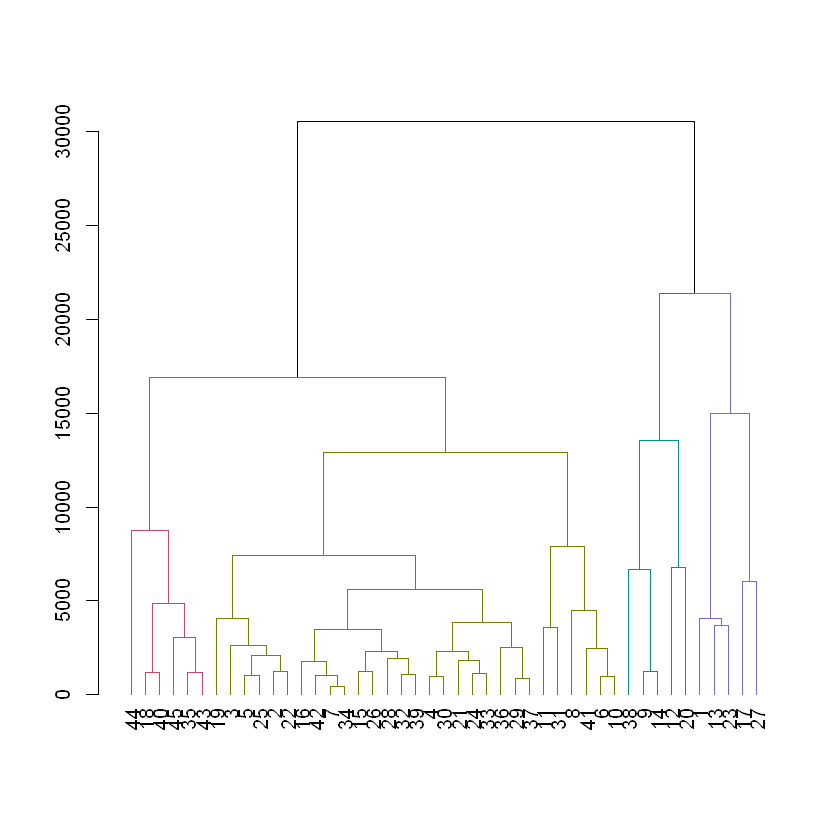

In [31]:
# Color the dendrogram based on the height cutoff
dend_customers <- as.dendrogram(hc_customers)
dend_colored <- color_branches(dend_customers, h=15000)

# Plot the colored dendrogram
plot(dend_colored)



In [32]:
# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(list(mean))

cluster,Milk,Grocery,Frozen
1,16950.000,12891.400,991.200
2,2512.828,5228.931,1795.517
3,10452.200,22550.600,1354.800
4,1249.500,3916.833,10888.667


- Customers in cluster 1 spent more money on Milk than any other cluster.
- Customers in cluster 3 spent more money on Grocery than any other cluster.
- Customers in cluster 4 spent more money on Frozen goods than any other cluster.
- The majority of customers fell into cluster 2 and did not show any excessive spending in any category.

whether they are meaningful depends heavily on the business context of the clustering.

# K-means clustering

Build an understanding of the principles behind the k-means algorithm, explore how to select the right k when it isn't previously known, and revisit the wholesale data from a different perspective.

### Introduction to K-means

In [33]:
head(
    lineup <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/1219/datasets/94af7037c5834527cc8799a9723ebf3b5af73015/lineup.rds"))) ,
    10
)

x,y
-1,1
-2,-3
8,6
7,-8
-12,8
-15,0
-13,-10
15,16
21,2
12,-15


### kmeans()

In [34]:
model = kmeans(lineup, centers = 2)

### Assigning clusters

In [35]:
head(model)

x,y
-11.33333,-0.5000000
14.83333,0.1666667


In [36]:
model$cluster

[1] 1 1 2 2 1 1 1 2 2 2 1 2

In [37]:
head(
    lineup_clustered <- lineup %>%
        mutate(cluster=model$cluster), 
    10
)

x,y,cluster
-1,1,1
-2,-3,1
8,6,2
7,-8,2
-12,8,1
-15,0,1
-13,-10,1
15,16,2
21,2,2
12,-15,2


### K-means on a soccer field

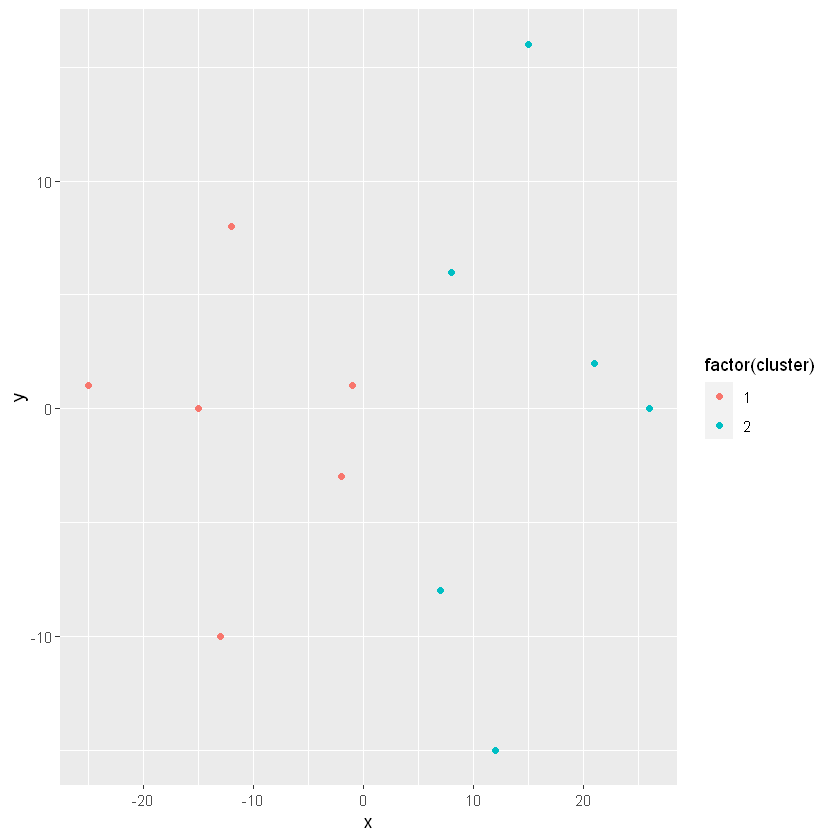

In [38]:
# Build a kmeans model
model_km2 <- kmeans(lineup, centers = 2)

# Extract the cluster assignment vector from the kmeans model
clust_km2 <- model_km2$cluster

# Create a new data frame appending the cluster assignment
lineup_km2 <- mutate(lineup, cluster = clust_km2)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km2, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

### K-means on a soccer field (part 2)

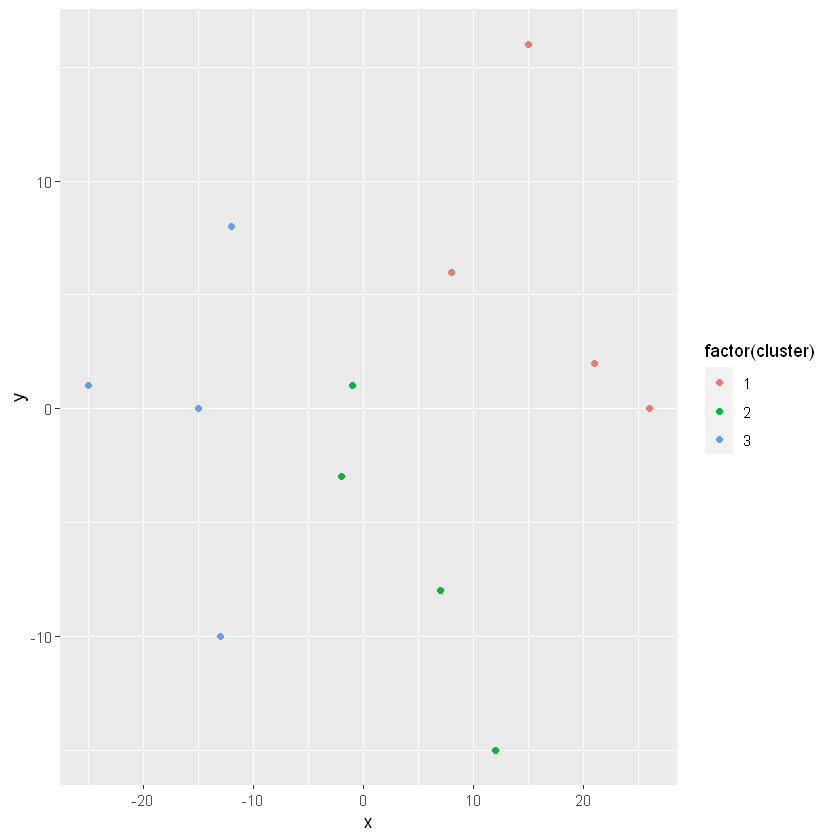

In [39]:
# Build a kmeans model
model_km3 <- kmeans(lineup, centers=3)

# Extract the cluster assignment vector from the kmeans model
clust_km3 <- model_km3$cluster

# Create a new data frame appending the cluster assignment
lineup_km3 <- mutate(lineup, cluster=clust_km3)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km3, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

## Evaluating different values of K by eye

### Generating the elbow plot

In [40]:
tot_withinss <- map_dbl(1:10, function(k){
    model_l <- kmeans(lineup, centers = k)
    model_l$tot.withinss
})
head(
    elbow_df_l <- data.frame(
    k=1:10,
    tot_withinss = tot_withinss
), 10)

k,tot_withinss
1,3489.9167
2,1434.5000
3,1049.0833
4,740.4167
5,406.0000
6,265.1667
7,228.1667
8,156.5000
9,82.0000
10,51.5000


### Generating the elbow plot

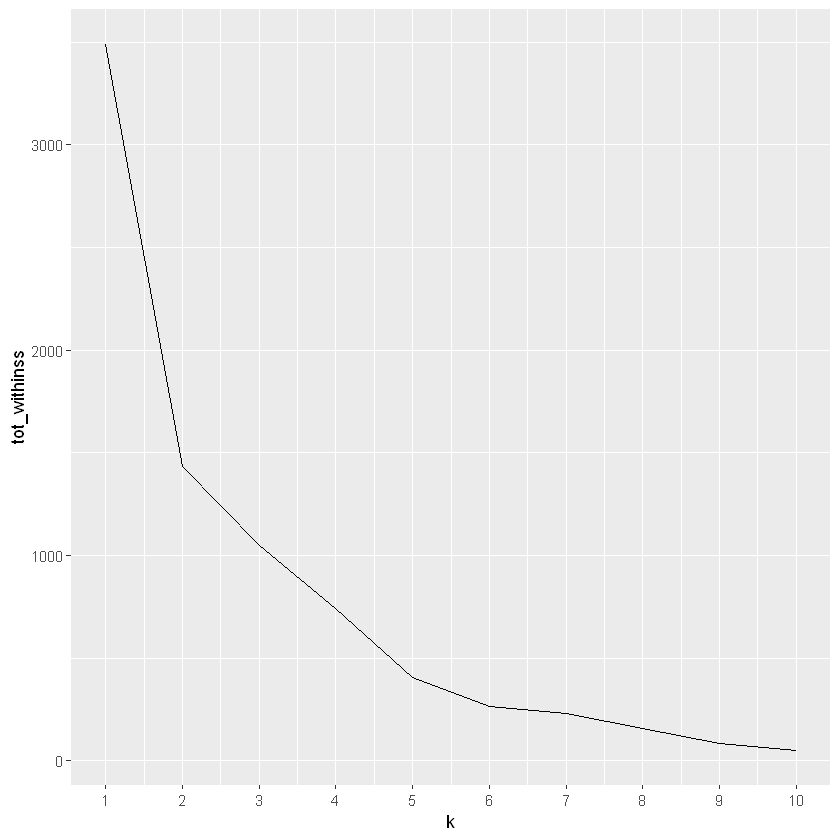

In [41]:
elbow_df_l %>%
    ggplot(aes(x=k, y=tot_withinss)) +
    geom_line() +
    scale_x_continuous(breaks = 1:10)

## Silhouette analysis: observation level performance

### Silhouette analysis

Silhouette analysis allows you to calculate how similar each observations is with the cluster it is assigned relative to other clusters. This metric (silhouette width) ranges from -1 to 1 for each observation in your data and can be interpreted as follows:

- Values close to 1 suggest that the observation is well matched to the assigned cluster
- Values close to 0 suggest that the observation is borderline matched between two clusters
- Values close to -1 suggest that the observations may be assigned to the wrong cluster

### Calculating S(i)

In [43]:
pam_k3 <- pam(lineup, k=3)
head(pam_k3$silinfo$widths, 10)

,cluster,neighbor,sil_width
4,1,2,0.465320054
2,1,3,0.321729341
10,1,2,0.311385893
1,1,3,0.271890169
9,2,1,0.443606497
8,2,1,0.398547473
12,2,1,0.393982685
3,2,1,-0.009151755
11,3,1,0.546797052
6,3,1,0.529967901


### Silhouette plot

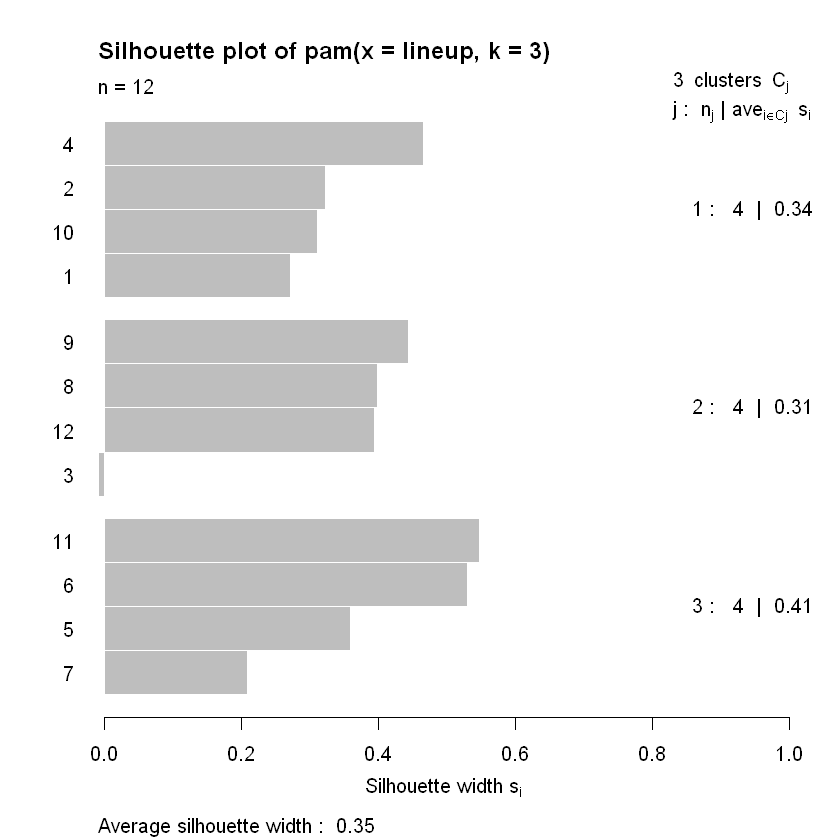

In [44]:
sil_plot <- silhouette(pam_k3)
plot(sil_plot)

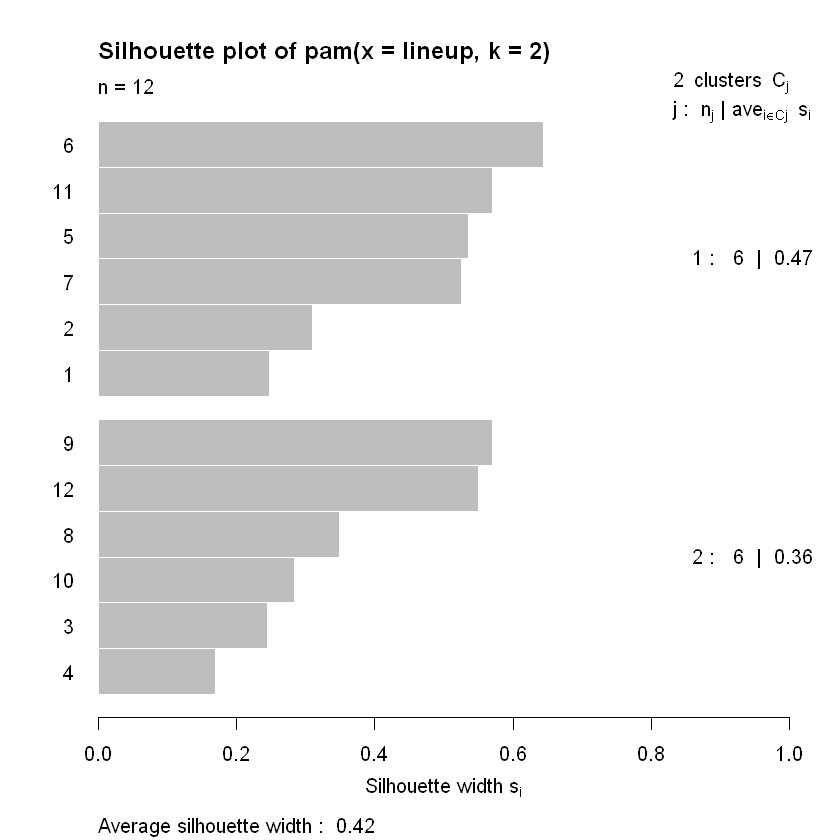

In [49]:
# Generate a k-means model using the pam() function with a k = 2
pam_k2 <- pam(lineup, k = 2)

# Plot the silhouette visual for the pam_k2 model
plot(silhouette(pam_k2))

for k = 2, no observation has a silhouette width close to 0? What about the fact that for k = 3, observation 3 is close to 0 and is negative? This suggests that k = 3 is not the right number of clusters.

### Average silhouette width

In [45]:
pam_k3$silinfo$avg.width

[1] 0.353414

- 1: Well matched to each cluster
- 0: Onborder between clusters 
- -1: Poorly matched to each cluster

### Highest average silhouette width

In [47]:
sil_width <- map_dbl(2:10, function(k){
    model_sil <- pam(lineup, k=k)
    model_sil$silinfo$avg.width
})
head(sil_df <- data.frame(
    k = 2:10,
    sil_width = sil_width
), 10)

k,sil_width
2,0.4164141
3,0.3534140
4,0.3535534
5,0.3724115
6,0.3436130
7,0.3236397
8,0.3275222
9,0.2547311
10,0.2099424


### Choosing K using average silhouette width

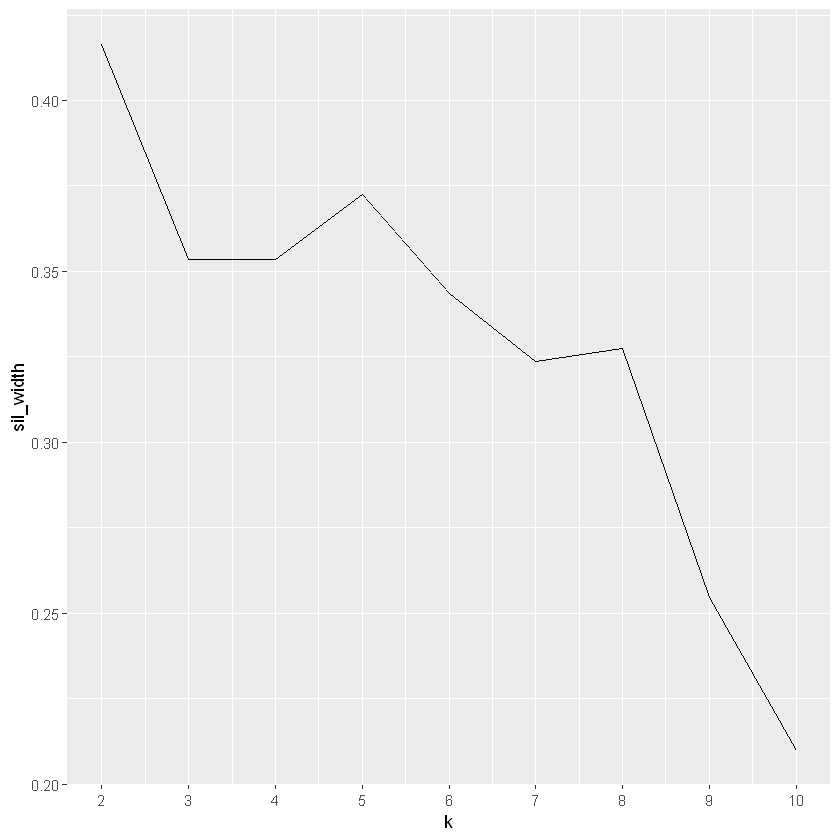

In [48]:
sil_df %>%
    ggplot(aes(x=k, y=sil_width)) +
    geom_line() +
    scale_x_continuous(breaks = 2:10)

## Making sense of the K-means clusters

### Segmenting with K-means
- Estimate the "best" k using average silhouette width
- Run k-means with the suggested k
- Characterize the spending habits of these clusters of customers


### Revisiting wholesale data: "Best" k

In [50]:
head(ws_customers, 10)

Milk,Grocery,Frozen
11103,12469,902
2013,6550,909
1897,5234,417
1304,3643,3045
3199,6986,1455
4560,9965,934
879,2060,264
6243,6360,824
13316,20399,1809
5302,9785,364


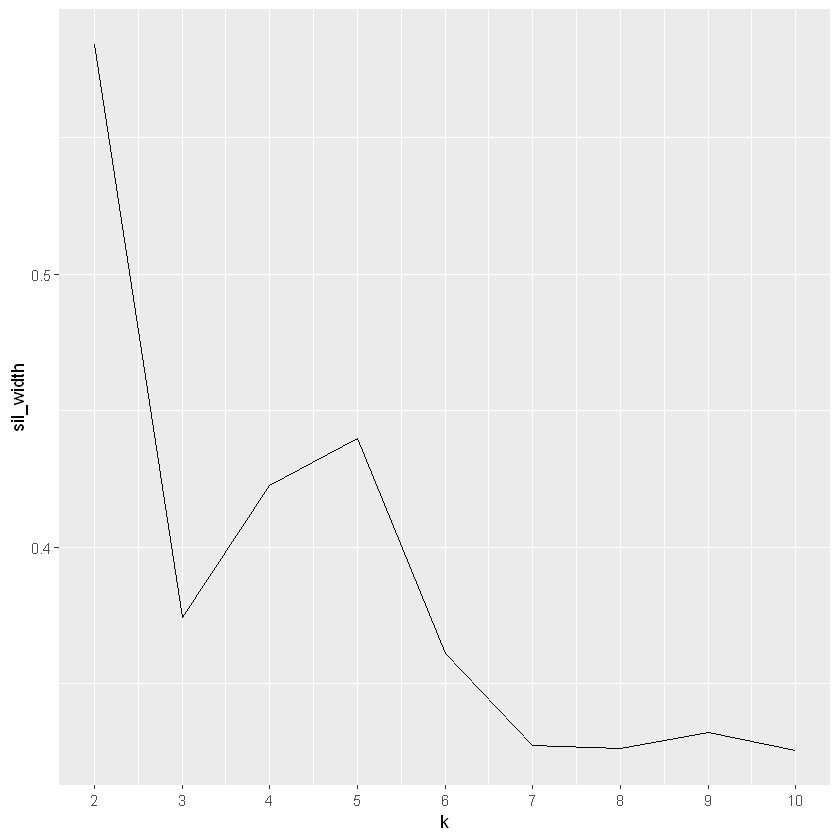

In [52]:
# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(x = ws_customers, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

k = 2 has the highest average sillhouette width and is the “best” value of k we will move forward with.

### Revisiting wholesale data: Exploration

From the previous analysis we have found that k = 2 has the highest average silhouette width. We will continue to analyze the wholesale customer data by building and exploring a kmeans model with 2 clusters.

In [55]:
set.seed(42)

# Build a k-means model for the customers_spend with a k of 2
model_customers <- kmeans(ws_customers, centers=2)

# Extract the vector of cluster assignments from the model
clust_customers <- model_customers$cluster

# Build the segment_customers data frame
segment_customers <- mutate(ws_customers, cluster = clust_customers)

# Calculate the size of each cluster
count(segment_customers, cluster)

cluster,n
1,35
2,10


In [56]:
# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(list(mean))

cluster,Milk,Grocery,Frozen
1,2296.257,5004,3354.343
2,13701.100,17721,1173.000


It seems that in this case cluster 1 consists of individuals who proportionally spend more on Frozen food while cluster 2 customers spent more on Milk and Grocery. When we explored this data using hierarchical clustering, the method resulted in 4 clusters while using k-means got us 2. Both of these results are valid, but which one is appropriate for this would require more subject matter expertise. Generating clusters is a science, but interpreting them is an art.